<h1>Импорт библиотек

In [7]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
import numpy as np
# TODO
def sum_prod(X, V):
    n = X[0].shape[0]
    result = np.zeros((n, 1))
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    
    return result
matrices = [
            np.array([[1, 0], [0, 1]]),
            np.array([[2, 0], [0, 2]]),
            np.array([[3, 0], [0, 3]])
        ]
vectors = [
            np.array([[1], [0]]),
            np.array([[0], [1]]),
            np.array([[1], [1]])
        ]
print(sum_prod(matrices, vectors))

[[4.]
 [5.]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
def binarize(M, threshold):
    result = M.copy()

    result[M > threshold] = 1
    result[M <= threshold] = 0
    
    return result

mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold = 5
result = binarize(mat, threshold)

np.testing.assert_array_equal(result, np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1]]))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [45]:
def unique_rows(mat):
    result = []
    for i in range(mat.shape[0]):
        unique_elements = np.unique(mat[i, :])
        result.append(unique_elements)

    return result

def unique_columns(mat):
    result = []
    for i in range(mat.shape[1]):
        unique_elements = np.unique(mat[:, i])
        result.append(unique_elements)
    
    return result


mat = np.array([
            [1, 2, 3, 2],
            [4, 5, 4, 5],
            [7, 8, 9, 8],
            [1, 2, 3, 4]
        ])
expected1 = [
            np.array([1, 2, 3]),
            np.array([4, 5]),
            np.array([7, 8, 9]),
            np.array([1, 2, 3, 4])
        ]
expected2 = [
            np.array([1, 4, 7]),
            np.array([2, 5, 8]),
            np.array([3, 4, 9]),
            np.array([2, 4, 5, 8])
        ]
for i, (res, exp) in enumerate(zip(unique_rows(mat), expected1)):
            np.testing.assert_array_equal(res, exp)

for i, (res, exp) in enumerate(zip(unique_columns(mat), expected2)):
            np.testing.assert_array_equal(res, exp)


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

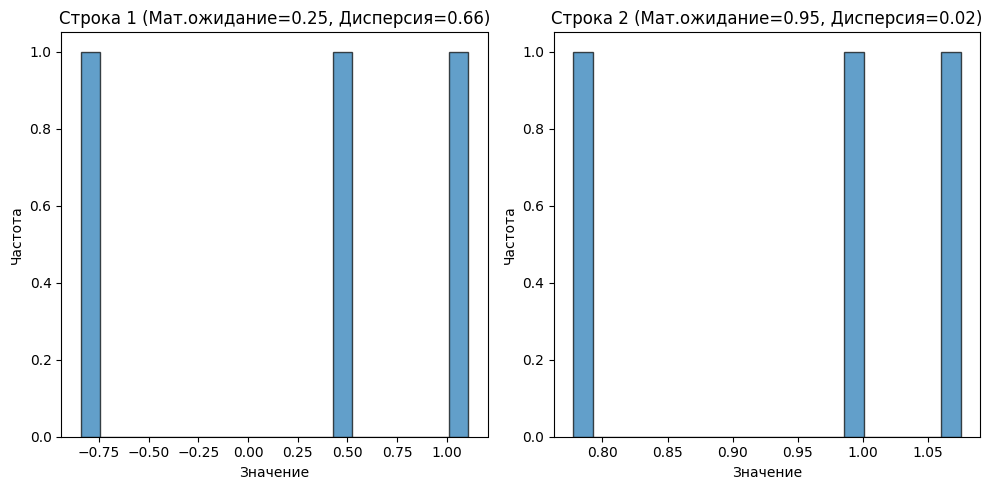

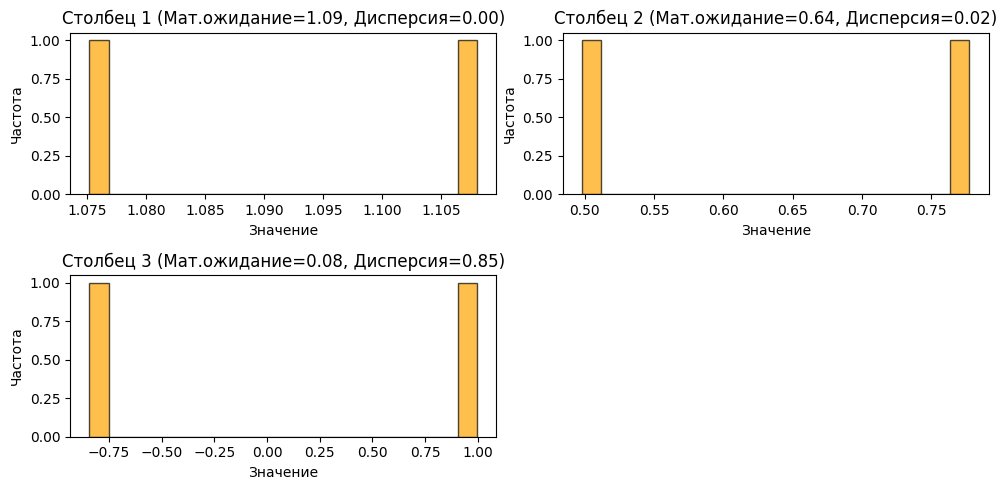

In [ ]:
def task4(m, n):
    mat = np.random.normal(size=(m, n))

    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)

    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    plt.figure(figsize=(10, 5))
    for i in range(m):
        plt.subplot((m+1)//2, 2, i+1)
        plt.hist(mat[i, :], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Строка {i+1} (Мат.ожидание={row_means[i]:.2f}, Дисперсия={row_vars[i]:.2f})')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    for j in range(n):
        plt.subplot((n+1)//2, 2, j+1)
        plt.hist(mat[:, j], bins=20, alpha=0.7, edgecolor='black', color='orange')
        plt.title(f'Столбец {j+1} (Мат.ожидание={col_means[j]:.2f}, Дисперсия={col_vars[j]:.2f})')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()

task4(2,3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
def chess(m, n, a, b):

    pattern = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                pattern[i, j] = True
            else:
                pattern[i, j] = False
                
    return np.where(pattern, a, b)

expected = np.array([[0, 1, 0],
                    [1, 0, 1],
                    [0, 1, 0]])
np.testing.assert_array_equal(chess(3,3,0,1), expected)

expected = np.array([[34, 6, 34],
                    [ 6, 34, 6]])
np.testing.assert_array_equal(chess(2,3,34,6), expected)

[[34  6 34]
 [ 6 34  6]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

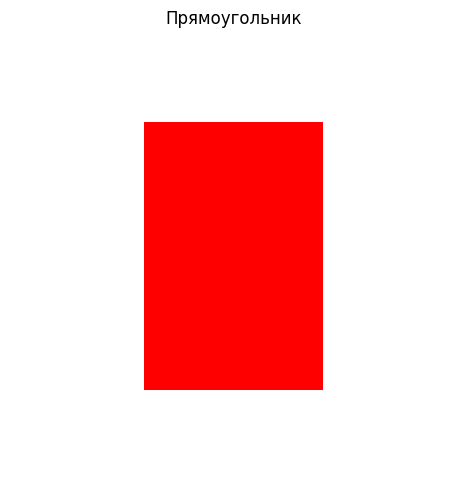

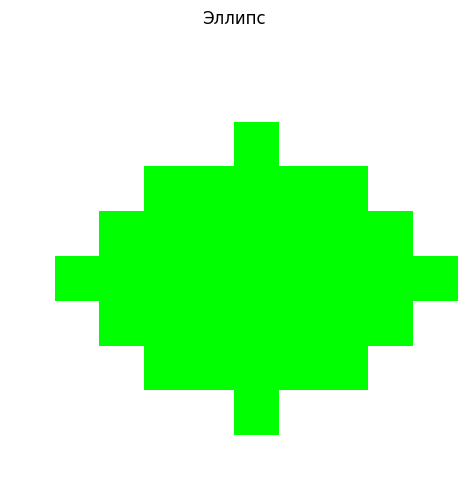

In [75]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):

    image = np.zeros((m, n, 3))
    image[:, :] = background_color
    
    x_start = (n - a) // 2
    y_start = (m - b) // 2

    image[y_start:y_start+b, x_start:x_start+a] = rectangle_color
    
    draw_image(image, "Прямоугольник")
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):

    image = np.zeros((m, n, 3))
    image[:, :] = background_color

    center_x, center_y = n // 2, m // 2
    
    y, x = np.ogrid[:m, :n]
    
    ellipse_mask = ((x - center_x) / a)**2 + ((y - center_y) / b)**2 <= 1
    
    image[ellipse_mask] = ellipse_color

    draw_image(image, "Эллипс")
    return image

def draw_image(image, title):
    fig, ax = plt.subplots(figsize=(15, 5))

    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()


img_rect = draw_rectangle(4, 6, 10, 10, (1, 0, 0), (1, 1, 1))
assert img_rect.shape == (10, 10, 3), "Неверный размер изображения"
center_region = img_rect[2:8, 3:7]  
assert np.all(center_region == (1, 0, 0)), "Прямоугольник не нарисован правильно"
bg_region = img_rect[0:2, 0:2]  
assert np.all(bg_region == (1, 1, 1)), "Фон не правильный"

img_ellipse = draw_ellipse(4, 3, 10, 10, (0, 1, 0), (1, 1, 1))
assert img_ellipse.shape == (10, 10, 3), "Неверный размер изображения"
assert np.all(img_ellipse[5, 5] == (0, 1, 0)), "Центр эллипса не закрашен"
assert np.all(img_ellipse[0, 0] == (1, 1, 1)), "Угол изображения не фон"

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [4]:
import numpy as np
def analyze_time_series(series, window_size):

    series = np.array(series)
    n = len(series)
    
    mean = np.mean(series)         
    variance = np.var(series)       
    std = np.std(series)            
    
    local_maxima = []
    local_minima = []
    
    for i in range(1, n-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append((i, series[i]))  
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append((i, series[i])) 
    
    moving_avg = np.zeros(n - window_size + 1)
    for i in range(len(moving_avg)):
        moving_avg[i] = np.mean(series[i:i+window_size])

    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_avg
    }


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
def one_hot_encoding(v):

    v = np.array(v)
    
    num_classes = np.max(v) + 1
  
    encoding = np.zeros((len(v), num_classes), dtype=int)

    encoding[np.arange(len(v)), v] = 1
    
    return encoding

expected = np.array([[1, 0, 0, 0], 
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1], 
                     [1, 0, 0, 0]])

np.testing.assert_array_equal(one_hot_encoding([0,2,3,0]), expected)